# Data Analysis Notebook 

This notebook is designed for the purpose of analyzing data obtained from the Hydra cluster. It provides a set of tools and techniques for performing data analysis tasks and extracting insights from the data.


## EE of the Cut for large range of system sizes


In [22]:
Sys.CPU_THREADS

6

In [23]:
using Base.Filesystem  # for creaating directories etc
using Random, Distributions  # random numbers
using HDF5  # hdf5 files
using QuantumClifford  # this is the stabilizer simulation package
using Plots # for plotting
using Formatting # string formatting
using LinearAlgebra # some useful matrices etc.
dep_path = "../AdditionalStructure/Julia/"
include("$(dep_path)NewTypes.jl")
include("$(dep_path)BitStringOps.jl")
include("$(dep_path)Measurements.jl")
include("$(dep_path)MICModels.jl")
include("$(dep_path)ModelRuns.jl")
include("$(dep_path)HelperTools.jl")
include("$(dep_path)Iterators.jl");

exp_index = 1
dir_extension = ""
file_prefix = "out/"
filename = "../Remote-Hydra/Toric_Code/data$(dir_extension)/$(file_prefix)TEE_exp:$(exp_index).h5"
data = h5read(filename, "/")

for key in keys(data)
    println("$key: $(data[key])")
end


exp_index: 1
p_b: 0.0
TEE: [2, 4, 4, 3, 2, 1, 2, 1, 1, 2, 2, 2, 4, 1, 4, 2, 2, 2, 2, 2, 2, 1, 3, 3, 1, 1, 1, 1, 2, 3, 1, 1, 2, 1, 2, 1, 1, 4, 2, 3, 2, 2, 1, 1, 2, 2, 3, 2, 2, 1, 2, 1, 3, 2, 3, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 1, 2, 1]
p_f: 0.55
L: 30
sys_type: Init_EdgeSquareLattice_KitaevDoNuT
EE_cut: [0 53 80 80 84 90 91 96 92 89 93 88 93 93 94 93 88 93 88 91 90 88 87 90 86 85 83 84 80 59 0; 0 54 81 82 85 93 91 93 95 94 92 91 90 93 91 89 90 87 90 86 90 85 86 86 84 88 87 83 77 48 0; 0 54 80 79 80 83 83 86 82 83 84 85 86 86 87 91 88 91 87 90 85 90 93 89 87 84 85 82 77 56 0; 0 50 79 80 84 85 86 87 87 85 86 89 90 92 90 91 93 85 87 89 94 91 88 87 83 82 85 84 78 55 0; 0 58 78 83 85 81 86 85 87 88 92 87 88 91 89 90 90 93 91 89 92 90 89 88 83 80 82 77 74 54 0; 0 54 81 83 87 87 90 87 85 90 88 89 89 91 93 90 86 86 87 89 87 86 87 86 85 88 85 82 79 55 0; 0 51 79 84 89 88 87 88 87 91 93 93 93 87 87 93 93 

In [24]:
dir_extension = ""
file_prefix = "out/"
all_data = []

model_data_dict = Dict()

for exp_index in 1:800
    filename = "../Remote-Hydra/Toric_Code/data$(dir_extension)/$(file_prefix)TEE_exp:$(exp_index).h5"
    if ispath(filename)
        data = h5read(filename, "/")
        # print(data["L"],",")
        push!(all_data, data)
        model_data_dict[(data["L"], data["p_b"], data["p_f"], data["p_fe"])] = data
    end
end
print("data sets read: ",length(all_data))

all_sizes = sort(collect(keys(model_data_dict)))

data sets read: 772

16-element Vector{Any}:
 (30, 0.0, 0.55, 0.0)
 (30, 0.1, 0.55, 0.0)
 (30, 0.1, 0.55, 0.1)
 (30, 0.2, 0.55, 0.1)
 (42, 0.0, 0.55, 0.0)
 (42, 0.1, 0.55, 0.0)
 (42, 0.1, 0.55, 0.1)
 (42, 0.2, 0.55, 0.1)
 (54, 0.0, 0.55, 0.0)
 (54, 0.1, 0.55, 0.0)
 (54, 0.1, 0.55, 0.1)
 (54, 0.2, 0.55, 0.1)
 (66, 0.0, 0.55, 0.0)
 (66, 0.1, 0.55, 0.0)
 (66, 0.1, 0.55, 0.1)
 (66, 0.2, 0.55, 0.1)

In [25]:
model_data_dict[(30, 0.0, 0.55, 0.0)]

Dict{String, Any} with 12 entries:
  "exp_index"   => 785
  "p_b"         => 0.0
  "TEE"         => [1, 1, 1, 1, 2, 2, 3, 2, 2, 3  …  1, 2, 2, 2, 1, 3, 1, 3, 1,…
  "p_f"         => 0.55
  "L"           => 30
  "sys_type"    => "Init_EdgeSquareLattice_KitaevDoNuT"
  "EE_cut"      => [0 52 … 55 0; 0 54 … 57 0; … ; 0 57 … 56 0; 0 55 … 53 0]
  "t_mmt"       => [70, 90, 110, 130, 150, 170, 190, 210, 230, 250  …  1870, 18…
  "p_fe"        => 0.0
  "filename"    => "/mnt/users/jovanovic/GitHub/Subsystem-Code-Physics/Remote-H…
  "description" => "Single Points in the Phase Diagram, TEE and EE cut."
  "d"           => 3

In [26]:
# Observables_t_p  = []
# for data in all_data
#     if data["L"] == 15
#         for i in 1:avr_back
#             push!(Observables_t_p, data["TEE"][end+1-i, :, :])
#         end
#     end
# end
# Observables_t_p_15  = cat(dims= 3, Observables_t_p...) # implement time averaging

In [27]:
function give_type(data)
    return (data["L"], data["p_b"], data["p_f"], data["p_fe"])
end

give_type (generic function with 1 method)

In [28]:
avr_back = "all" # I will not use this at the moment!

CUT_dict_helper = Dict(
    size_key => [] for size_key in keys(model_data_dict)
)

for data in all_data
    size_key = give_type(data)
    push!(CUT_dict_helper[size_key], permutedims(data["EE_cut"],(2,1)))
end

CUT_dict = Dict()

for size_key in all_sizes
    CUT_dict[size_key] = cat(dims= 2, CUT_dict_helper[size_key]...)
end

CUT_means = Dict()
CUT_vars = Dict()
CUT_errs = Dict()
CUT_medians = Dict()

for size_key in all_sizes
    CUT_means[size_key] = mean(CUT_dict[size_key], dims = 2)
    CUT_vars[size_key] = var(CUT_dict[size_key], dims = 2)
    CUT_errs[size_key] = std(CUT_dict[size_key], dims = 2) / sqrt(size(CUT_dict[size_key], 2))
    CUT_medians[size_key] = median(CUT_dict[size_key], dims = 2)
end

CUT_Stats = Dict(
    "mean" => CUT_means,
    "var" => CUT_vars,
    "err" => CUT_errs,
    "median" => CUT_medians
)


Dict{String, Dict{Any, Any}} with 4 entries:
  "median" => Dict((54, 0.0, 0.55, 0.0)=>[0.0; 98.0; … ; 98.0; 0.0;;], (30, 0.2…
  "err"    => Dict((54, 0.0, 0.55, 0.0)=>[0.0; 0.0412869; … ; 0.0414803; 0.0;;]…
  "mean"   => Dict((54, 0.0, 0.55, 0.0)=>[0.0; 98.1052; … ; 98.0972; 0.0;;], (3…
  "var"    => Dict((54, 0.0, 0.55, 0.0)=>[0.0; 8.52304; … ; 8.60307; 0.0;;], (3…

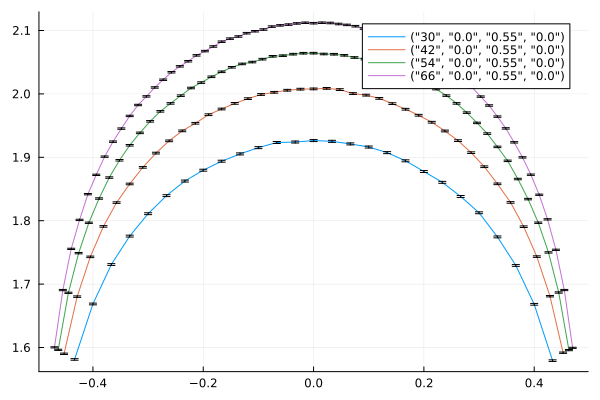

In [29]:
stat = "mean"
ribbon = "err"


plot()
for size_key in all_sizes[1:4:end]
    L, p_b, p_f, p_fe = size_key
    x_axis = get_subdiv_array(L, "all") .- L/2
    x_axis = x_axis./L
    y_axis = CUT_Stats[stat][size_key][:] .- L # SAGE to inform which subleading term to cancel
    volume_scale = L^2
    area_scale = L
    critical_scale = L*log2(L)
    scale = area_scale
    y_axis = y_axis./scale
    y_err = CUT_Stats[ribbon][size_key][:]
    y_err = y_err./scale 
    plot!(x_axis[3:end-2], y_axis[3:end-2], yerror = y_err[3:end-2], label = size_key)
end

plot!()

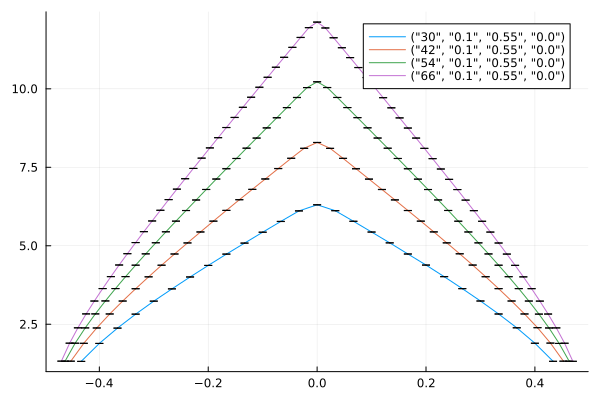

In [30]:
stat = "mean"
ribbon = "err"


plot()
for size_key in all_sizes[2:4:end]
    L, p_b, p_f, p_fe = size_key
    x_axis = get_subdiv_array(L, "all") .- L/2
    x_axis = x_axis./L
    y_axis = CUT_Stats[stat][size_key][:] .- L # SAGE to inform which subleading term to cancel
    volume_scale = L^2
    area_scale = L
    critical_scale = L*log2(L)
    scale = area_scale
    y_axis = y_axis./scale
    y_err = CUT_Stats[ribbon][size_key][:]
    y_err = y_err./scale 
    plot!(x_axis[3:end-2], y_axis[3:end-2], yerror = y_err[3:end-2], label = size_key)
end

plot!()

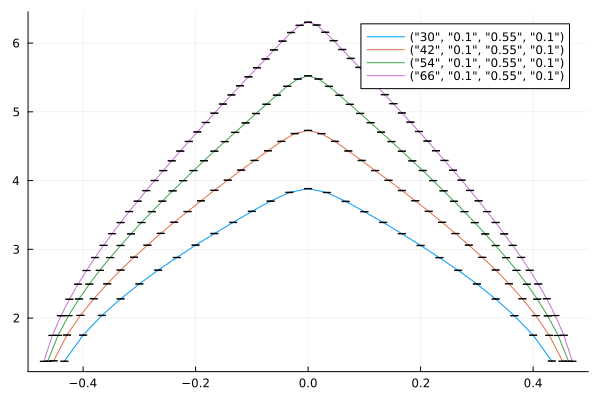

In [31]:
stat = "mean"
ribbon = "err"


plot()
for size_key in all_sizes[3:4:end]
    L, p_b, p_f, p_fe = size_key
    x_axis = get_subdiv_array(L, "all") .- L/2
    x_axis = x_axis./L
    y_axis = CUT_Stats[stat][size_key][:] .- L # SAGE to inform which subleading term to cancel
    volume_scale = L^2
    area_scale = L
    critical_scale = L*log2(L)
    scale = area_scale
    y_axis = y_axis./scale
    y_err = CUT_Stats[ribbon][size_key][:]
    y_err = y_err./scale 
    plot!(x_axis[3:end-2], y_axis[3:end-2], yerror = y_err[3:end-2], label = size_key)
end

plot!()

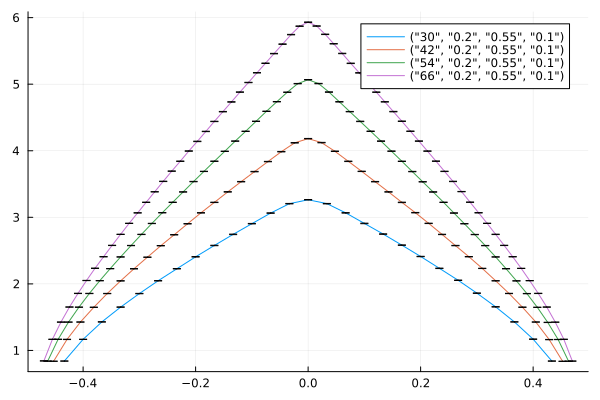

In [32]:
stat = "mean"
ribbon = "err"


plot()
for size_key in all_sizes[4:4:end]
    L, p_b, p_f, p_fe = size_key
    x_axis = get_subdiv_array(L, "all") .- L/2
    x_axis = x_axis./L
    y_axis = CUT_Stats[stat][size_key][:] .- L # SAGE to inform which subleading term to cancel
    volume_scale = L^2
    area_scale = L
    critical_scale = L*log2(L)
    scale = area_scale
    y_axis = y_axis./scale
    y_err = CUT_Stats[ribbon][size_key][:]
    y_err = y_err./scale 
    plot!(x_axis[3:end-2], y_axis[3:end-2], yerror = y_err[3:end-2], label = size_key)
end

plot!()